# Classification
## Logistic Regression

In [1]:
library(caret)
library(ISLR)
data(Default)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

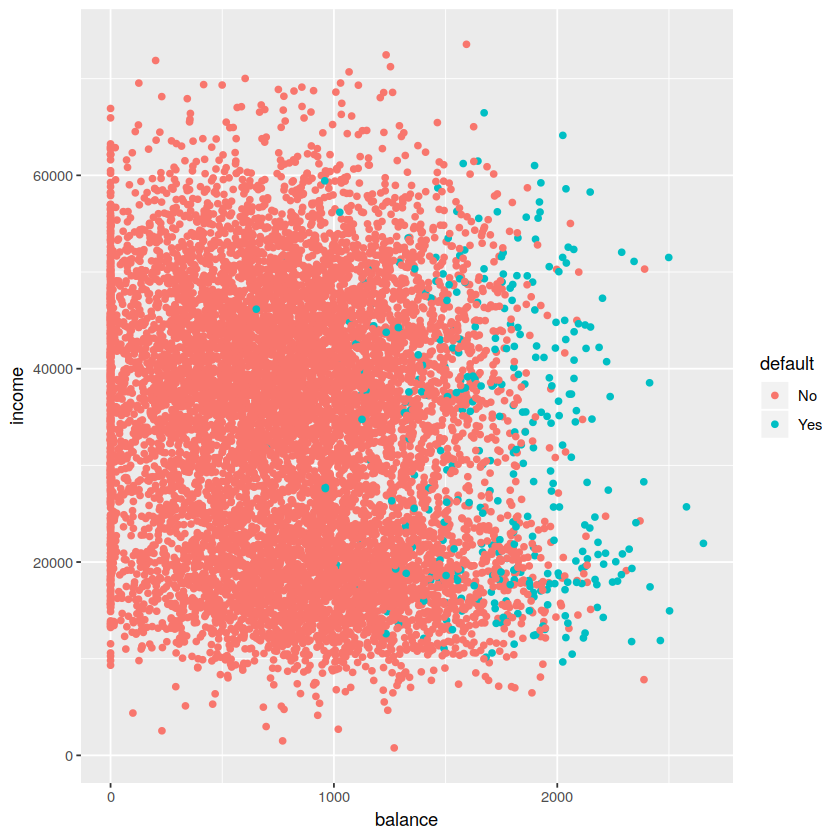

In [4]:
library(ggplot2)
ggplot(Default,aes(x=balance,y=income,color=default)) + geom_point()

In [6]:
fit <- glm(default~balance+income,family="binomial",data=Default)
print(summary(fit))


Call:
glm(formula = default ~ balance + income, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8



In [8]:
data <- Default
data$income.boundary <- -(coef(fit)[1]+coef(fit)[2]*data$balance)/coef(fit)[3]

Warning message:
“Removed 9724 rows containing missing values (geom_path).”

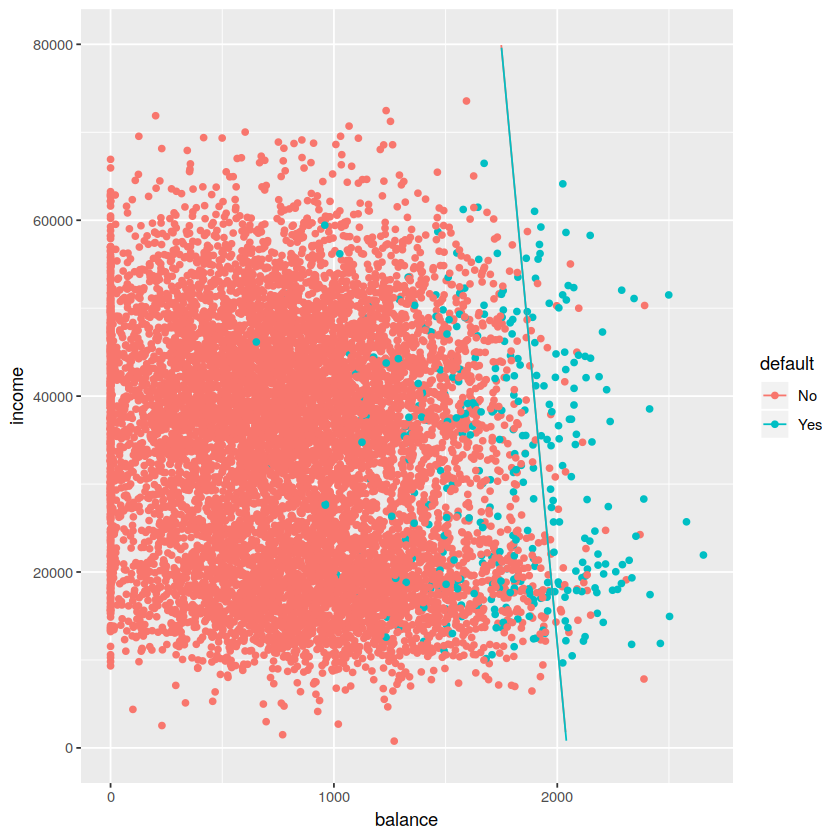

In [15]:
ggplot(data,aes(x=balance,y=income,color=default))+geom_point()+geom_line(aes(y=income.boundary))+ ylim(0,80000) 

In [18]:
fit <- glm(default~.,family="binomial",data=Default)

In [30]:
pred <- as.factor(ifelse(predict(fit,type="response")>0.5,"Yes","No"))
confusionMatrix(pred,Default$default,positive="Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  9627  228
       Yes   40  105
                                          
               Accuracy : 0.9732          
                 95% CI : (0.9698, 0.9763)
    No Information Rate : 0.9667          
    P-Value [Acc > NIR] : 0.0001044       
                                          
                  Kappa : 0.4278          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.3153          
            Specificity : 0.9959          
         Pos Pred Value : 0.7241          
         Neg Pred Value : 0.9769          
             Prevalence : 0.0333          
         Detection Rate : 0.0105          
   Detection Prevalence : 0.0145          
      Balanced Accuracy : 0.6556          
                                          
       'Positive' Class : Yes             
                                          

In [31]:
pred <- as.factor(ifelse(predict(fit,type="response")>0.3,"Yes","No"))
confusionMatrix(pred,Default$default,positive="Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  9530  164
       Yes  137  169
                                          
               Accuracy : 0.9699          
                 95% CI : (0.9664, 0.9732)
    No Information Rate : 0.9667          
    P-Value [Acc > NIR] : 0.03797         
                                          
                  Kappa : 0.5134          
 Mcnemar's Test P-Value : 0.13397         
                                          
            Sensitivity : 0.5075          
            Specificity : 0.9858          
         Pos Pred Value : 0.5523          
         Neg Pred Value : 0.9831          
             Prevalence : 0.0333          
         Detection Rate : 0.0169          
   Detection Prevalence : 0.0306          
      Balanced Accuracy : 0.7467          
                                          
       'Positive' Class : Yes             
                                          

In [32]:
compute.roc <- function(scores,truth) {
    #scores = predicted probabilities
    #truth = true class
    thresholds <- exp(seq(-10,0,length.out=200))
    true.positive <- numeric(length(thresholds))
    false.positive <- numeric(length(thresholds))
    for(i in seq_along(thresholds)) {
        pred <- factor(ifelse(scores>thresholds[[i]],"Yes","No"),levels=c("Yes","No"))
        true.positive[i] <- sum(pred=="Yes" & truth=="Yes") / sum(truth=="Yes")
        false.positive[i] <- sum(pred=="Yes" & truth=="No")/sum(truth=="No")
    }
    return(list(thresholds=thresholds,true.positive=true.positive,false.positive=false.positive))
}

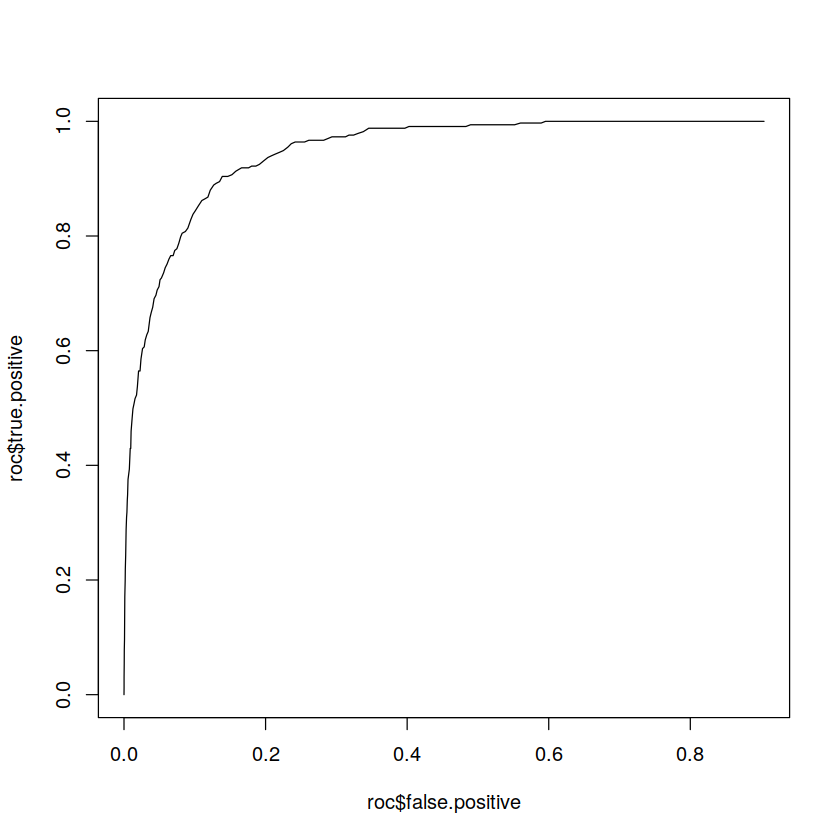

In [33]:
scores <- predict(fit,type="response")
roc <- compute.roc(scores,Default$default)
plot(roc$false.positive,roc$true.positive,type='l')

In [43]:
auc <- function(roc) {
    fpr <- roc$false.positive
    idx <- order(fpr)
    fpr <- fpr[idx]
    tpr <- roc$true.positive[idx]
    return(sum(diff(fpr)*tpr[-length(tpr)]))
}

In [44]:
auc(roc)

[1] 0.8528196

In [48]:
scoresx <- runif(length(Default$default))
rocx <- compute.roc(scoresx,Default$default)
print(auc(rocx))

[1] 0.4841424
